In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
print(os.listdir('data'))

['BloodBrain', 'cars', 'ChemicalManufacturingProcess', 'concrete', 'cox2', 'datalist', 'dataset_42_soybean.csv', 'dhfr', 'FuelEconomy', 'GermanCredit', 'glass.csv', 'GrantApplication', 'hepatic', 'logisticCreditPredictions', 'mdrr', 'oil', 'permeability', 'pottery', 'schedulingData', 'segmentationData', 'tecator', 'twoClassData']


In [114]:
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, Normalizer
from sklearn.pipeline import make_pipeline



In [ ]:
# summary preprocessing
# ---------------------

# 1. check near-zero variance features
#    - found 7 features with near zero variance -> remove
#
# 2. check distribution and skewness in numeric features
#    - many features have skewed distribution -> try boxcox or yeo-johnson transformation
#    - each feature has different scale -> scaling 
#    - outliers -> L2-normaization 
#
# 3. check correlation between features
#    - after yeo-johnson | spatial sign transformation -> slightly reduce average correlations
#    - plot corr threshold against remaining predictor & new average correlation

In [22]:
data = pd.read_csv('data/BloodBrain/bbbDescr.csv', index_col=0)
labels = pd.read_csv('data/BloodBrain/logBBB.csv', index_col=0).rename(columns={'0':'target'})

In [18]:
data.head()

,tpsa,nbasic,negative,vsa_hyd,a_aro,weight,peoe_vsa.0,peoe_vsa.1,peoe_vsa.2,peoe_vsa.3,...,scaa3,ctdh,ctaa,mchg,achg,rdta,n_sp2,n_sp3,o_sp2,o_sp3
1,12.030000,1,0,167.06700,0,156.293,76.94749,43.44619,0.00000,0.000000,...,-0.0093,1,1,0.9241,0.9241,1.0000,0.000000,6.0255,0.000000,0.000000
2,49.330002,0,0,92.64243,6,151.165,38.24339,25.52006,0.00000,8.619013,...,-0.0754,2,2,1.2685,1.0420,1.0000,0.000000,6.5681,32.010201,33.613499
3,50.529999,1,0,295.16700,15,366.485,58.05473,124.74020,21.65084,8.619013,...,-0.0303,1,4,1.2562,1.2562,0.2500,26.973301,10.8567,0.000000,27.545099
4,37.389999,0,0,319.11220,15,382.552,62.23933,124.74020,13.19232,21.785640,...,-0.0240,1,3,1.1962,1.1962,0.3333,21.706499,11.0017,0.000000,15.131600
5,37.389999,1,0,299.65800,12,326.464,74.80064,118.04060,33.00190,0.000000,...,-0.0255,1,3,1.2934,1.2934,0.3333,24.206100,10.8109,0.000000,15.133300


In [23]:
labels.head()

,target
0,1.08
1,-0.40
2,0.22
3,0.14
4,0.69


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 1 to 208
Columns: 134 entries, tpsa to o_sp3
dtypes: float64(118), int64(16)
memory usage: 219.4 KB


In [20]:
data.isnull().sum().sum()

0

In [25]:
data_stats = data.describe().T

In [27]:
data_stats

,count,mean,std,min,25%,50%,75%,max
tpsa,208.0,52.865432,28.108693,3.24000,35.829999,45.885000,72.680000,166.750000
nbasic,208.0,0.365385,0.482700,0.00000,0.000000,0.000000,1.000000,1.000000
negative,208.0,0.004808,0.069338,0.00000,0.000000,0.000000,0.000000,1.000000
vsa_hyd,208.0,234.944332,86.344682,65.44252,163.876675,231.431100,300.537775,492.999700
a_aro,208.0,9.706731,4.847984,0.00000,6.000000,11.000000,12.000000,21.000000
weight,208.0,310.576481,93.539020,129.20700,250.362000,303.797500,376.891250,671.863000
peoe_vsa.0,208.0,63.175459,34.430956,0.00000,38.729560,63.857305,84.910122,149.284300
peoe_vsa.1,208.0,75.774593,40.134717,0.00000,40.971247,76.571995,107.163525,162.362900
peoe_vsa.2,208.0,14.954809,17.005926,0.00000,0.000000,9.424675,24.869060,120.050900
peoe_vsa.3,208.0,10.977483,14.522596,0.00000,0.000000,5.442076,17.238030,94.244530


#### degenerative columns
* 1) unique values < 10%
* 2) no1_count / no2_count > 20

In [39]:
unique_by_cols = data.nunique() / len(data) * 100

In [42]:
low_unique_cols = unique_by_cols.index[unique_by_cols < 10].tolist()
print("{} columns have number of unique values lower than 10%".format(len(low_unique_cols)))

30 columns have number of unique values lower than 10%


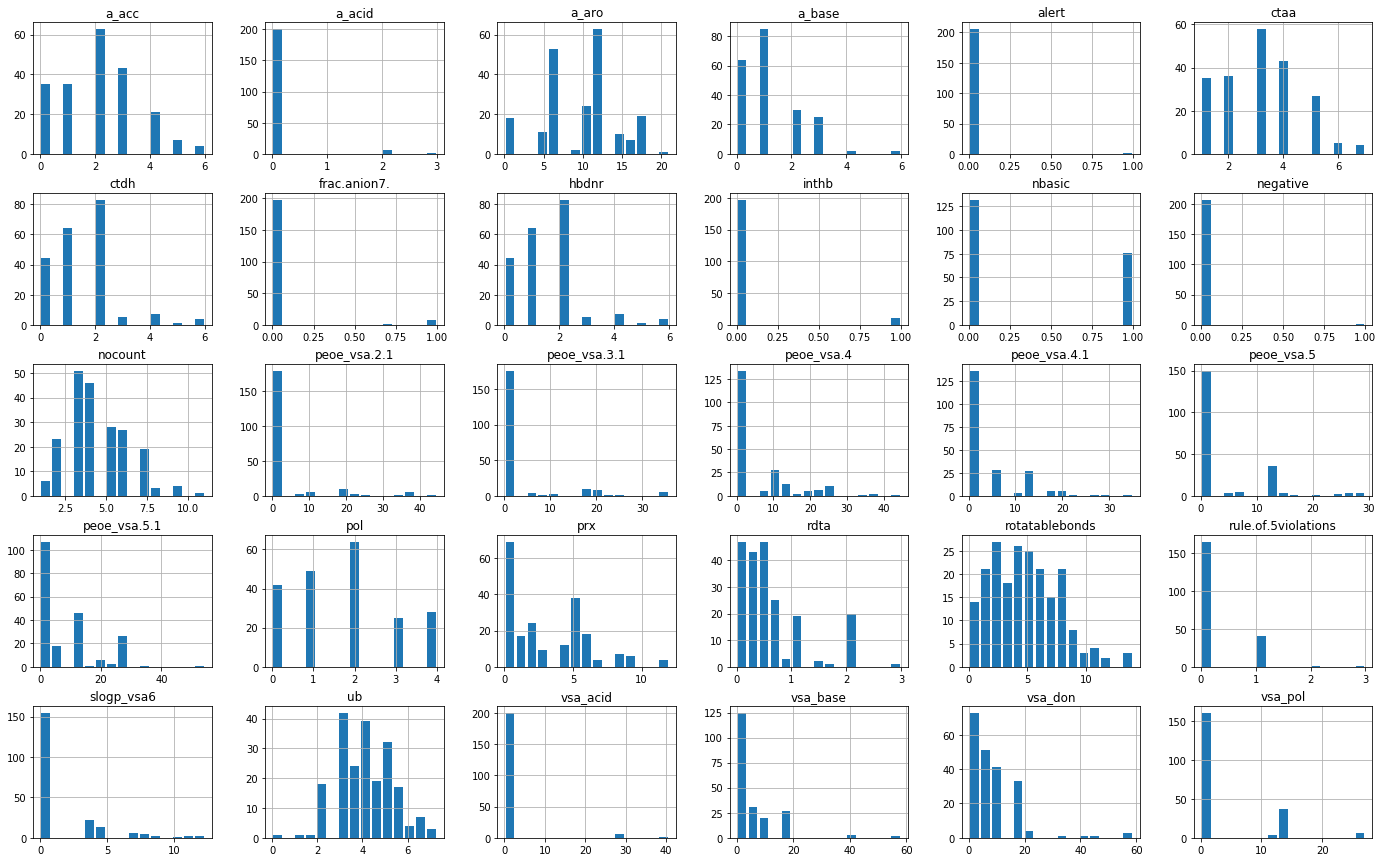

In [43]:
axs = data[low_unique_cols].hist(bins=15, rwidth=.8, 
                                 layout=(5, 6), figsize=(24, 15))

In [64]:
def ratio_no1_vs_no2(x):
    try:
        a, b = pd.value_counts(x).head(2).values
        return a / b
    except ValueError:   # only one value
        return 999

In [65]:
print("Ratio: no1/no2")
print('--------------')

high_ratio_cols = []
for col in low_unique_cols:
    r = ratio_no1_vs_no2(data[col])
    print("{}: {:.2f}".format(col, r))
    if r > 20:
        high_ratio_cols.append(col)

Ratio: no1/no2
--------------
nbasic: 1.74
negative: 207.00
a_aro: 1.19
peoe_vsa.4: 4.96
peoe_vsa.5: 4.29
peoe_vsa.2.1: 25.57
peoe_vsa.3.1: 21.00
peoe_vsa.4.1: 4.81
peoe_vsa.5.1: 2.25
a_acc: 1.47
a_acid: 33.50
a_base: 1.33
vsa_acid: 33.50
vsa_base: 4.03
vsa_don: 1.43
vsa_pol: 4.35
slogp_vsa6: 7.05
frac.anion7.: 47.75
rotatablebonds: 1.04
nocount: 1.11
hbdnr: 1.30
rule.of.5violations: 4.02
alert: 103.00
prx: 1.82
ub: 1.08
pol: 1.31
inthb: 17.91
ctdh: 1.30
ctaa: 1.35
rdta: 1.29


In [60]:
high_ratio_cols

['negative',
 'peoe_vsa.2.1',
 'peoe_vsa.3.1',
 'a_acid',
 'vsa_acid',
 'frac.anion7.',
 'alert']

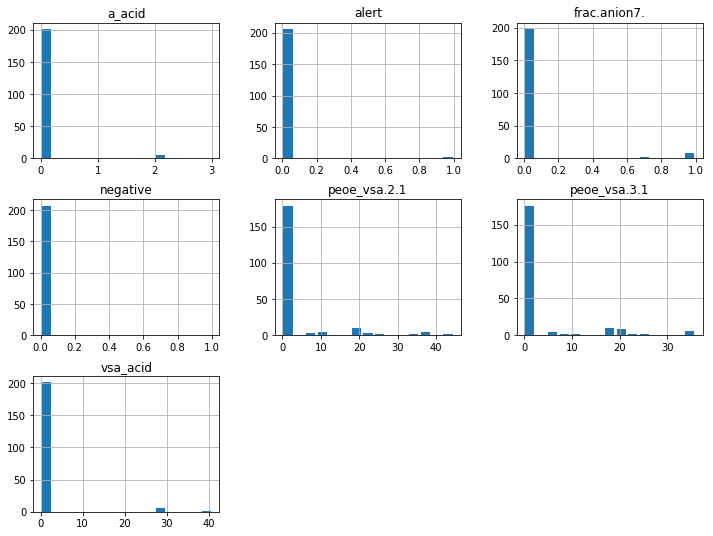

In [62]:
axs = data[high_ratio_cols].hist(bins=15, rwidth=.8, figsize=(12, 9))

In [63]:
pd.value_counts(data[col])

0.0000    44
0.5000    34
0.3333    25
0.6667    23
2.0000    20
1.0000    19
0.4000    11
0.2500     9
0.2000     7
0.1667     3
1.5000     2
0.7500     2
0.2857     2
0.8000     2
3.0000     1
0.6000     1
1.6667     1
0.8571     1
0.5714     1
Name: rdta, dtype: int64

In [66]:
data = data.drop(columns=high_ratio_cols)
print("data shape after removing near-zero features: {}".format(data.shape))

data shape after removing near-zero features: (208, 127)


#### Distributions of features

In [84]:
int_cols = data.select_dtypes('int64').columns.tolist()
float_cols = data.select_dtypes('float64').columns.tolist()

print('{} int64 columns, {} float54 columns'.format(len(int_cols), len(float_cols)))

13 int64 columns, 114 float54 columns


#### int64 columns:

In [85]:
data[int_cols].nunique()

nbasic                  2
a_aro                  12
a_acc                   7
a_base                  6
rotatablebonds         14
nocount                10
hbdnr                   7
rule.of.5violations     4
prx                    11
pol                     5
inthb                   2
ctdh                    7
ctaa                    7
dtype: int64

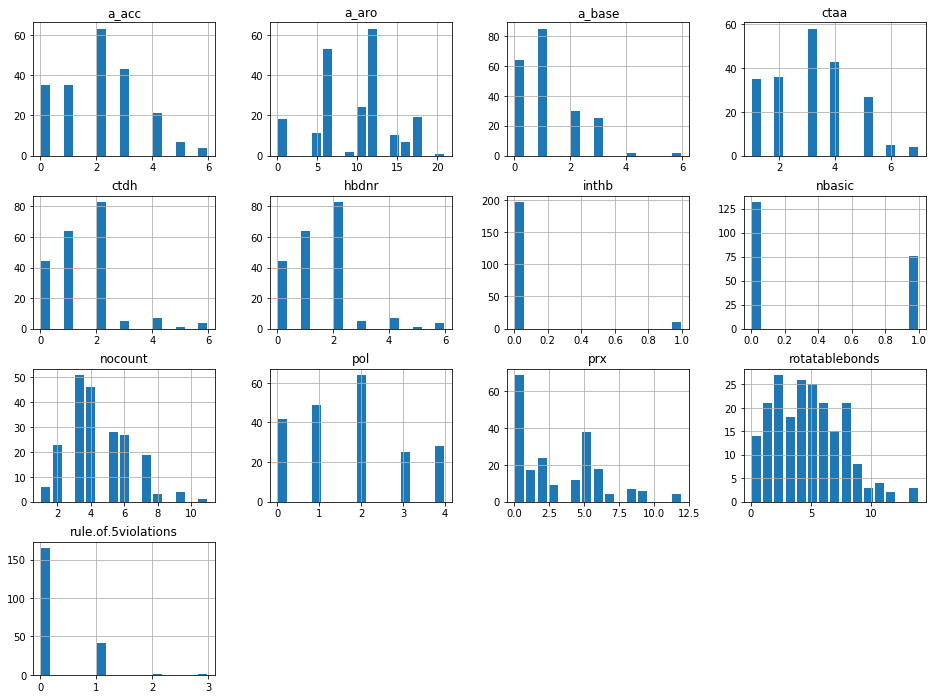

In [86]:
axs = data[int_cols].hist(bins=15, rwidth=.8, figsize=(16, 12))

#### float64 columns:

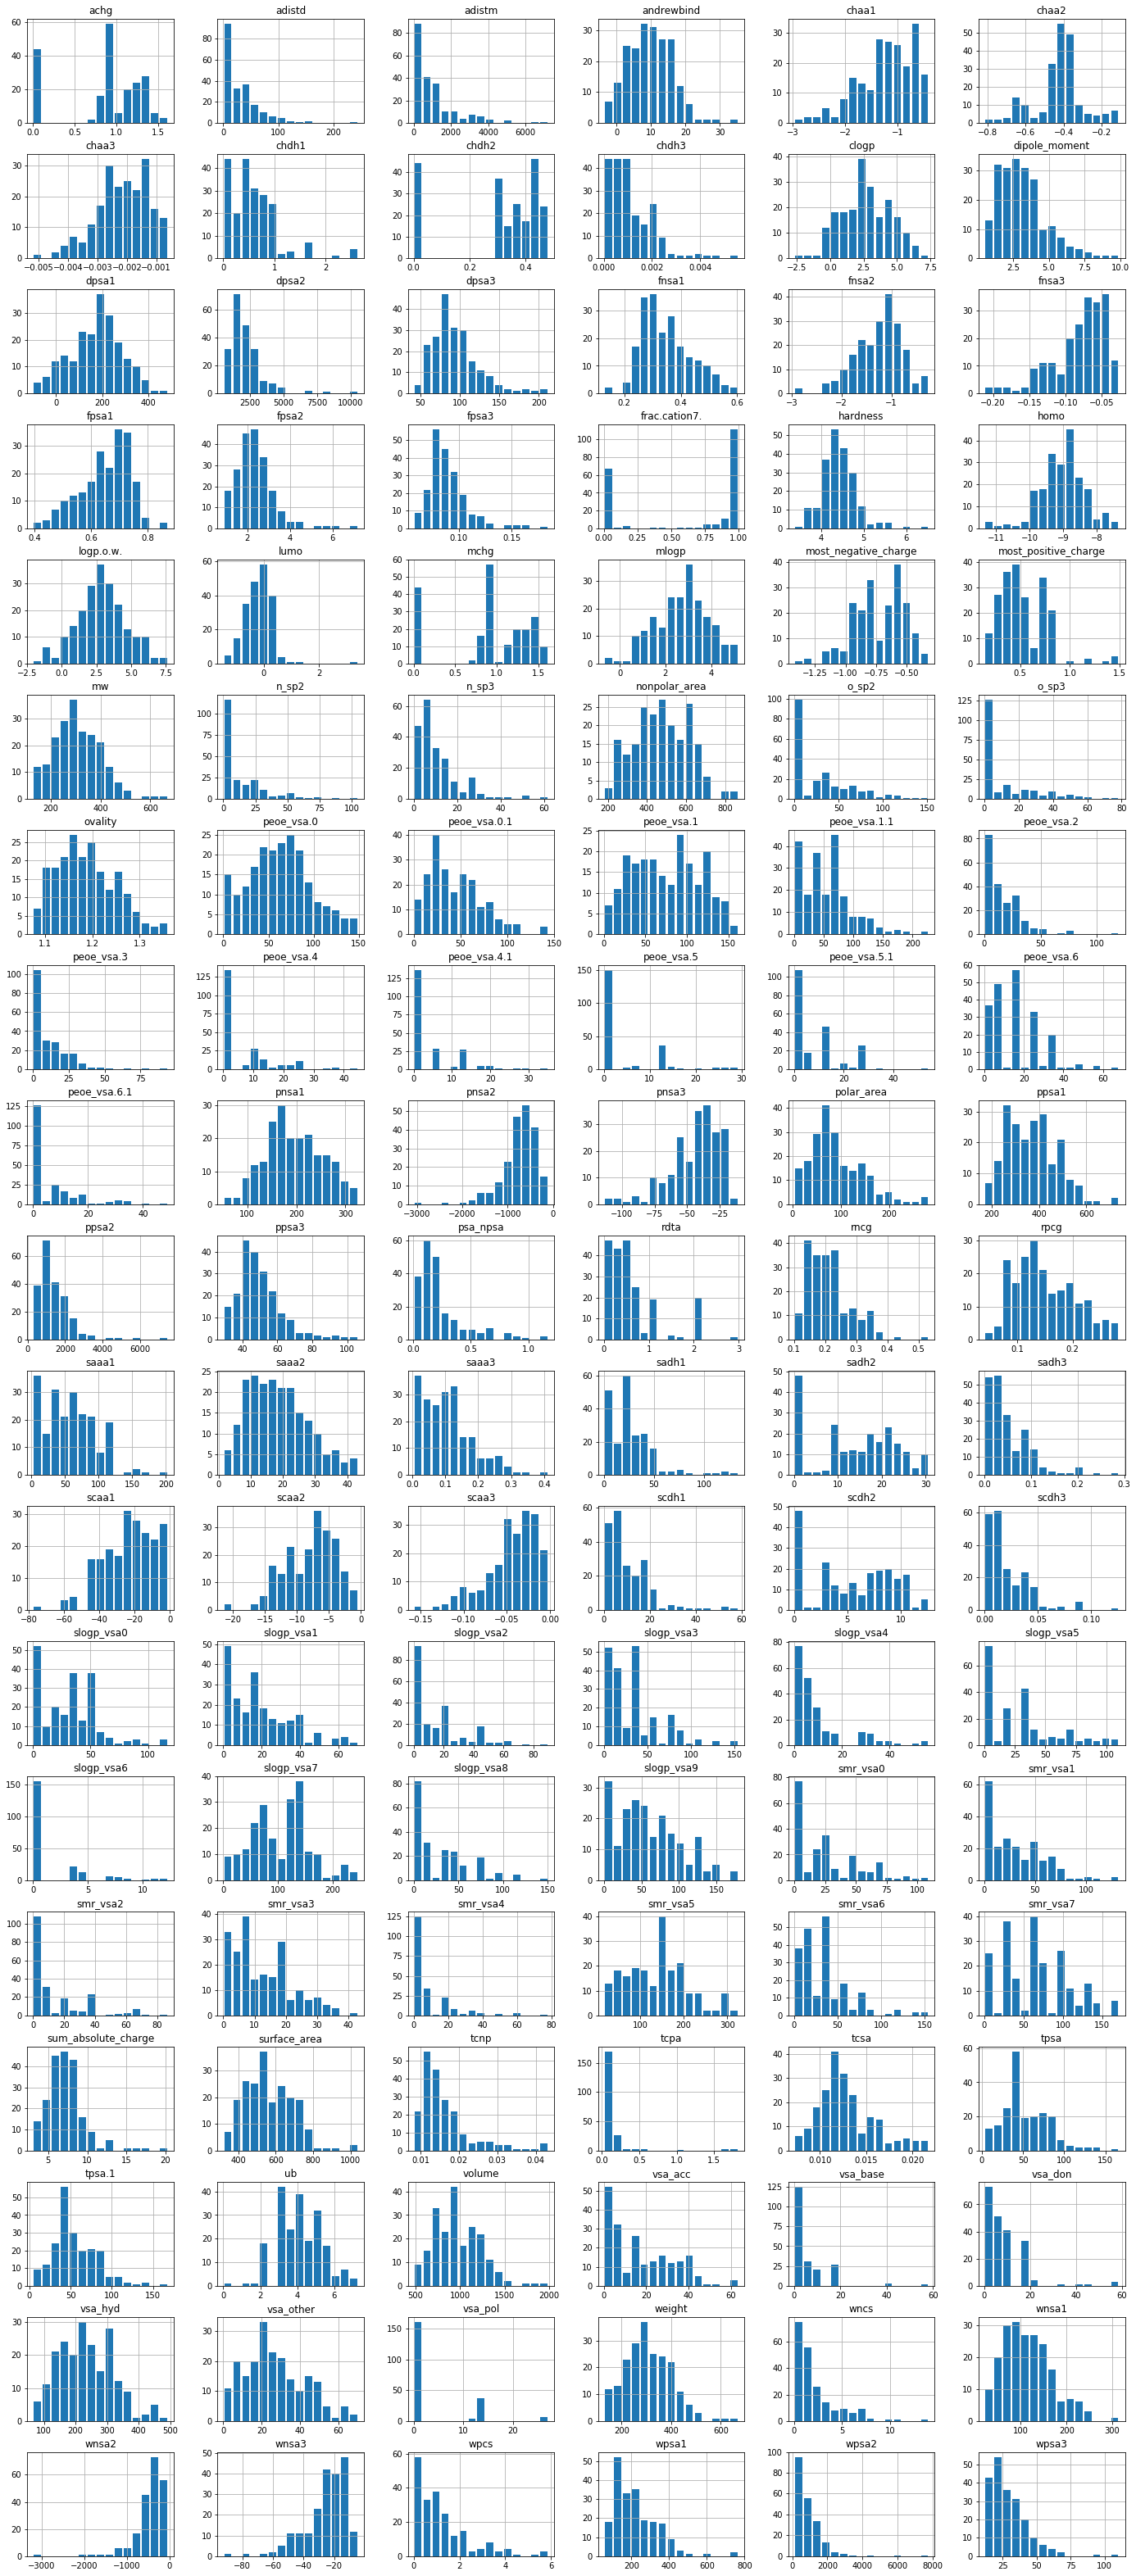

In [87]:
axs = data[float_cols].hist(bins=15, rwidth=.8, figsize=(24, 60), layout=(20, 6))

In [91]:
skewness_by_cols = data.skew().sort_values()

In [92]:
skewness_by_cols.describe()

count    127.000000
mean       0.884795
std        1.178516
min       -3.165831
25%        0.270881
50%        0.903165
75%        1.641232
max        5.409053
dtype: float64

In [93]:
skewness_by_cols.head(10)

wnsa2   -3.165831
pnsa2   -1.814650
wnsa3   -1.471809
fnsa3   -1.184387
chdh2   -1.084224
pnsa3   -1.060962
scaa3   -1.042663
achg    -0.876145
mchg    -0.773065
chaa1   -0.680514
dtype: float64

In [95]:
skewness_by_cols.tail(20)

slogp_vsa4             1.940909
tcnp                   1.952506
n_sp2                  1.979618
wpsa3                  1.980486
n_sp3                  2.006699
psa_npsa               2.036261
slogp_vsa6             2.067101
adistm                 2.072694
peoe_vsa.2             2.123195
adistd                 2.177881
peoe_vsa.3             2.191660
rule.of.5violations    2.236722
smr_vsa4               2.328530
vsa_don                2.478052
dpsa2                  2.745344
ppsa2                  2.859822
vsa_base               2.907461
inthb                  4.024696
wpsa2                  4.101239
tcpa                   5.409053
dtype: float64

In [96]:
# since many features contain negative values -> use yeo-johnson transformation
data_stats['min'].describe()

count     134.000000
mean      -30.553070
std       391.485758
min     -3199.727051
25%         0.000000
50%         0.000000
75%         0.052875
max       505.243286
Name: min, dtype: float64

#### Yeo-Johnson transformation

In [97]:
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

In [98]:
data_yeo = pd.DataFrame(yeo_johnson_transformer.fit_transform(data), columns=data.columns)

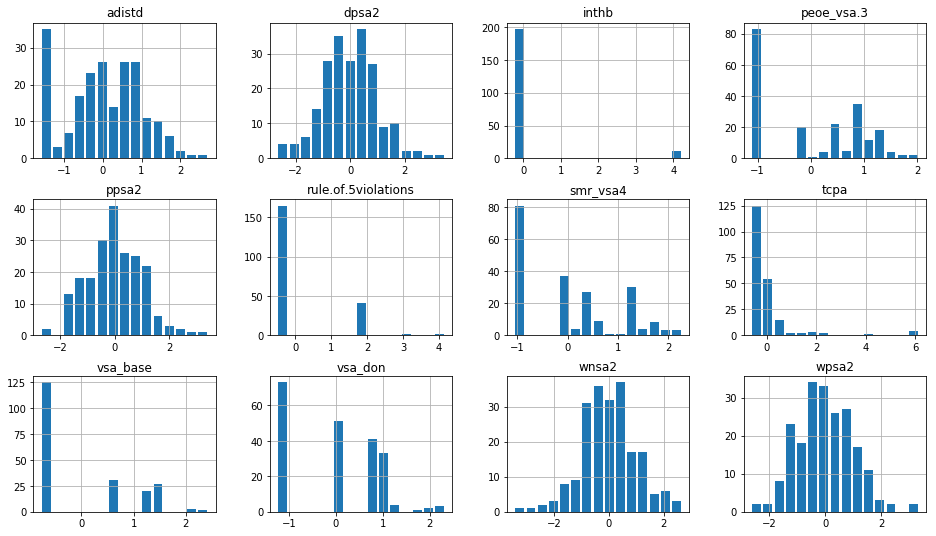

In [106]:
# top 10 skewness columns: after yeo-johnson transformation
cols = skewness_by_cols.abs().sort_values(ascending=False).head(12).index.tolist()
axs = data_yeo[cols].hist(bins=15, rwidth=.8, figsize=(16, 9), layout=(3, 4))

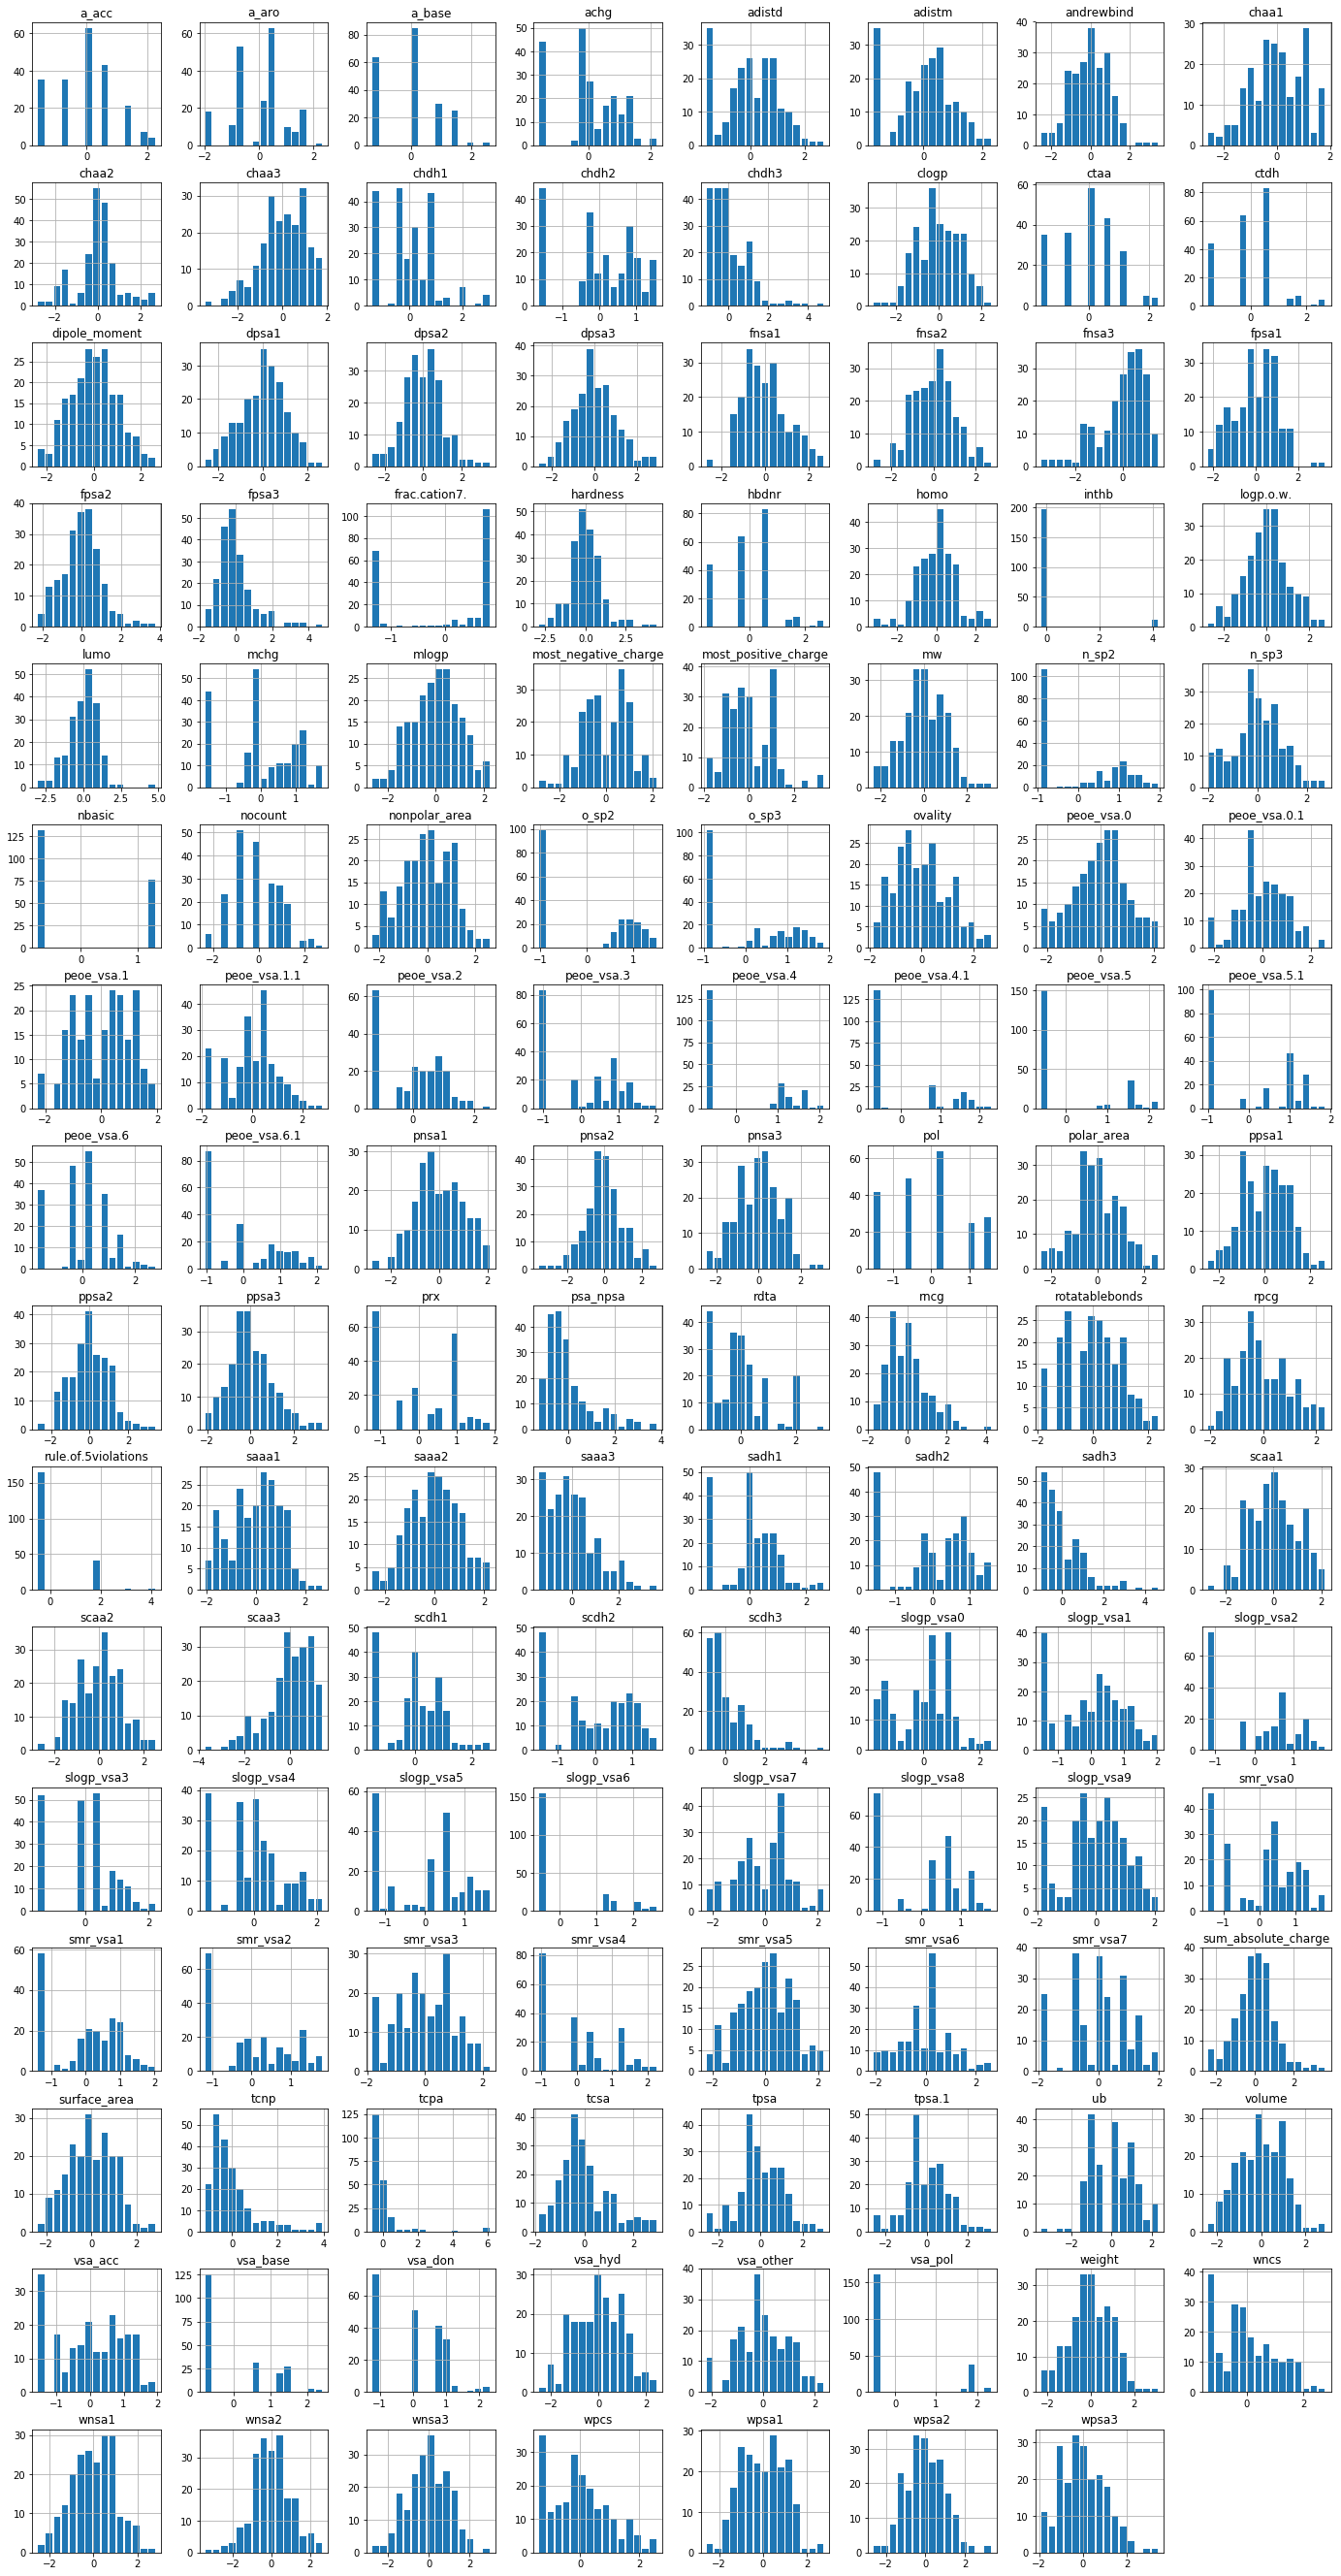

In [101]:
# histogram after Yeo-Johnson transformation
axs = data_yeo.hist(bins=15, rwidth=.8, layout=(16, 8), figsize=(24, 48))

#### Spatial sign transformation

In [115]:
spatial = make_pipeline(RobustScaler(), Normalizer())

In [116]:
data_spatial = pd.DataFrame(spatial.fit_transform(data), columns=data.columns)

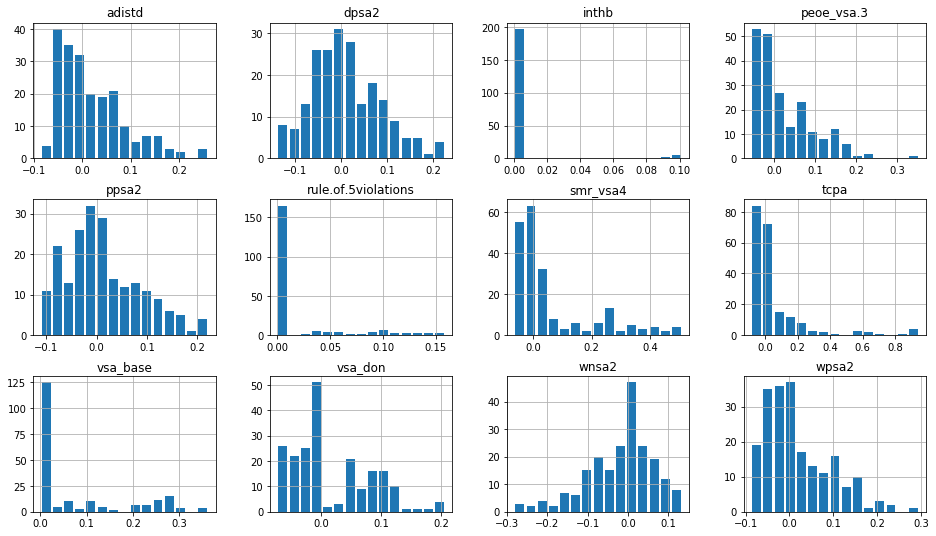

In [117]:
# some highly skewed features after Spatial sign transformation
axs = data_spatial[cols].hist(bins=15, rwidth=.8, figsize=(16, 9), layout=(3, 4))

#### correlations

In [107]:
# by looking at variable names 
# -> many share similar names 
# -> expect to have high correlation between them
data.columns.tolist()

['tpsa',
 'nbasic',
 'vsa_hyd',
 'a_aro',
 'weight',
 'peoe_vsa.0',
 'peoe_vsa.1',
 'peoe_vsa.2',
 'peoe_vsa.3',
 'peoe_vsa.4',
 'peoe_vsa.5',
 'peoe_vsa.6',
 'peoe_vsa.0.1',
 'peoe_vsa.1.1',
 'peoe_vsa.4.1',
 'peoe_vsa.5.1',
 'peoe_vsa.6.1',
 'a_acc',
 'a_base',
 'vsa_acc',
 'vsa_base',
 'vsa_don',
 'vsa_other',
 'vsa_pol',
 'slogp_vsa0',
 'slogp_vsa1',
 'slogp_vsa2',
 'slogp_vsa3',
 'slogp_vsa4',
 'slogp_vsa5',
 'slogp_vsa6',
 'slogp_vsa7',
 'slogp_vsa8',
 'slogp_vsa9',
 'smr_vsa0',
 'smr_vsa1',
 'smr_vsa2',
 'smr_vsa3',
 'smr_vsa4',
 'smr_vsa5',
 'smr_vsa6',
 'smr_vsa7',
 'tpsa.1',
 'logp.o.w.',
 'frac.cation7.',
 'andrewbind',
 'rotatablebonds',
 'mlogp',
 'clogp',
 'mw',
 'nocount',
 'hbdnr',
 'rule.of.5violations',
 'prx',
 'ub',
 'pol',
 'inthb',
 'adistm',
 'adistd',
 'polar_area',
 'nonpolar_area',
 'psa_npsa',
 'tcsa',
 'tcpa',
 'tcnp',
 'ovality',
 'surface_area',
 'volume',
 'most_negative_charge',
 'most_positive_charge',
 'sum_absolute_charge',
 'dipole_moment',
 'homo',


In [118]:
corr = data.corr()
corr_yeo = data_yeo.corr()
corr_spatial = data_spatial.corr()

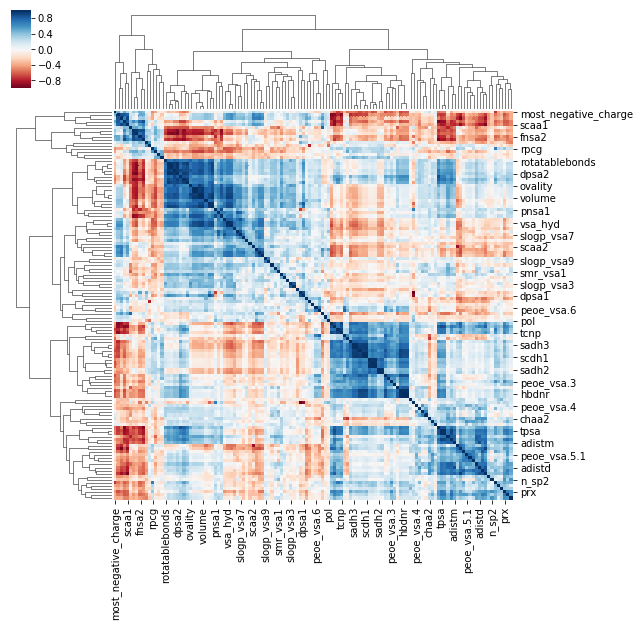

In [112]:
sns.clustermap(corr, method='average', vmin=-1., vmax=1., cmap=plt.cm.RdBu, figsize=(9, 9))

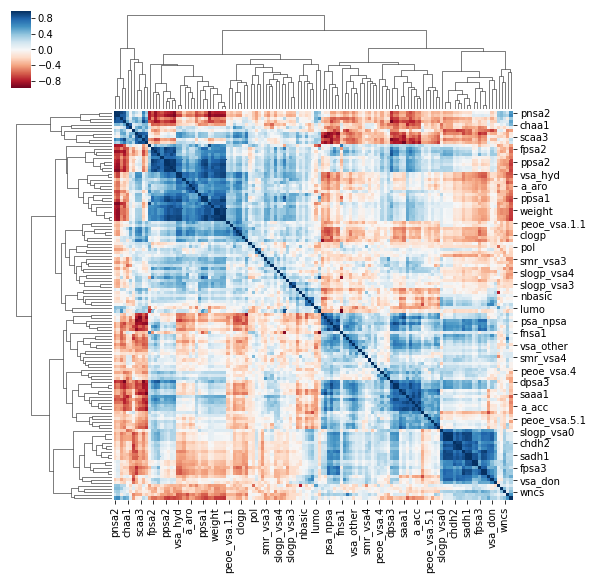

In [113]:
sns.clustermap(corr_yeo, method='average', vmin=-1., vmax=1., cmap=plt.cm.RdBu, figsize=(9, 9))

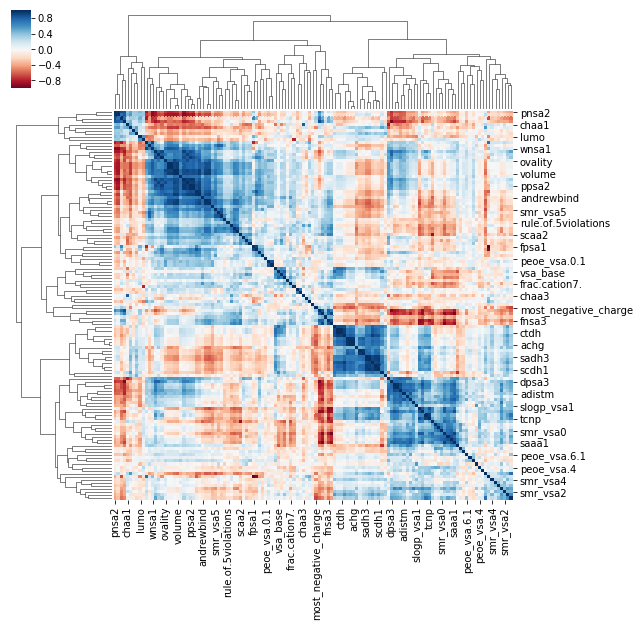

In [119]:
sns.clustermap(corr_spatial, method='average', vmin=-1., vmax=1., cmap=plt.cm.RdBu, figsize=(9, 9))

In [142]:
# statistics: original data correlation
n = len(corr)
idx1, idx2 = np.tril_indices(n)
pd.Series(corr.values[idx1, idx2]).describe()

count    8128.000000
mean        0.069452
std         0.339966
min        -1.000000
25%        -0.157677
50%         0.058038
75%         0.282549
max         0.999975
dtype: float64

In [143]:
# statistics: correlation after yeo-johnson transformation
pd.Series(corr_yeo.values[idx1, idx2] ).describe()

count    8128.000000
mean        0.066205
std         0.343507
min        -0.994858
25%        -0.166153
50%         0.052454
75%         0.286172
max         0.999971
dtype: float64

In [144]:
# statistics: correlation after spatial-sign transformation
pd.Series(corr_spatial.values[idx1, idx2]).describe()

count    8128.000000
mean        0.053073
std         0.327535
min        -1.000000
25%        -0.164139
50%         0.029144
75%         0.252431
max         0.999961
dtype: float64

In [164]:
# get pairs of (col_1, col_2) which have correlation > threshold 
# then sort them by abs(correlation)
thresholds = np.arange(.25, .96, .05)
num_removes = []
new_average_corr = []

for threshold in thresholds:
    all_cols = corr.columns.tolist()

    candidate_pairs = sorted([(all_cols[i], all_cols[j], corr.iloc[i, j]) 
                                        for i in range(len(all_cols)-1) 
                                        for j in range(i+1, len(all_cols))
                                       if abs(corr.iloc[i,j]>=threshold)
                      ], key=lambda x: abs(x[-1]), reverse=True)

    to_remove = set()
    for c1, c2, _ in candidate_pairs:
        # check if already removed columns
        if (c1 in to_remove) or (c2 in to_remove):
            continue
        # which columns has higher average correlation between other columns
        if corr[c1].mean() > corr[c2].mean():
            to_remove.add(c1)
        else:
            to_remove.add(c2)

    to_remove = list(to_remove)
    num_removes.append(len(to_remove))
    new_corr = data.drop(columns=to_remove).corr().values
    np.fill_diagonal(new_corr, 0.)
    idx1, idx2 = np.tril_indices(len(new_corr))
    new_average_corr.append(np.abs(new_corr[idx1, idx2]).mean())
    print("threshold: {:.2f}".format(threshold))
    print('-----------------')
    print("found {} highly correlated columns to remove".format(len(to_remove)))
    print()

threshold: 0.25
-----------------
found 115 highly correlated columns to remove

threshold: 0.30
-----------------
found 112 highly correlated columns to remove

threshold: 0.35
-----------------
found 108 highly correlated columns to remove

threshold: 0.40
-----------------
found 102 highly correlated columns to remove

threshold: 0.45
-----------------
found 95 highly correlated columns to remove

threshold: 0.50
-----------------
found 90 highly correlated columns to remove

threshold: 0.55
-----------------
found 84 highly correlated columns to remove

threshold: 0.60
-----------------
found 76 highly correlated columns to remove

threshold: 0.65
-----------------
found 71 highly correlated columns to remove

threshold: 0.70
-----------------
found 64 highly correlated columns to remove

threshold: 0.75
-----------------
found 57 highly correlated columns to remove

threshold: 0.80
-----------------
found 50 highly correlated columns to remove

threshold: 0.85
-----------------
fo

Text(0.5,0,'threshold')

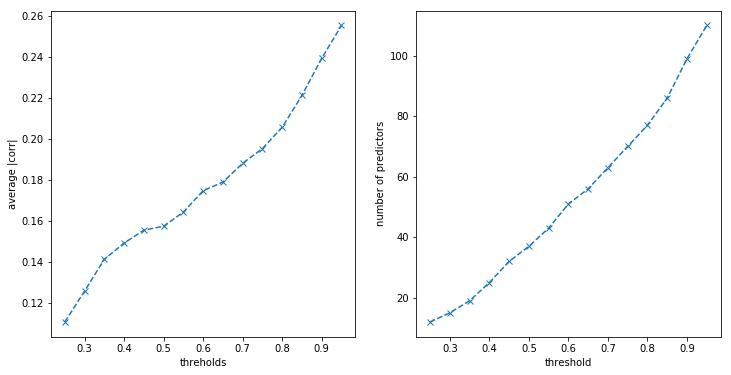

In [171]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(thresholds, new_average_corr, 'x--')
plt.xlabel('threholds')
plt.ylabel('average |corr|')

plt.subplot(122)
plt.plot(thresholds, len(all_cols)-np.array(num_removes), 'x--')
plt.ylabel('number of predictors')
plt.xlabel('threshold')
